In [113]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
ratings = []
dates = []

url = 'https://www.flipkart.com/vivo-y21-midnight-blue-64-gb/product-reviews/itmf123866f9d6dd?pid=MOBG5VFCFQNPGR9J&lid=LSTMOBG5VFCFQNPGR9JFC9C8W&aid=overall&certifiedBuyer=false&sortOrder=MOST_RECENT&page=1'
response=requests.get(url)
htmlcontent=response.content
soup=BeautifulSoup(htmlcontent,"html.parser")
pages = soup.find('div',attrs={'class':'_2MImiq _1Qnn1K'})

pages = pages.get_text()
if ',' in pages:
    pages = pages.replace(',','')
pages = int(pages[10:-15])

In [115]:
pages

87

In [116]:
for j in range (pages):
    j=j+1
    url = 'https://www.flipkart.com/vivo-y21-midnight-blue-64-gb/product-reviews/itmf123866f9d6dd?pid=MOBG5VFCFQNPGR9J&lid=LSTMOBG5VFCFQNPGR9JFC9C8W&aid=overall&certifiedBuyer=false&sortOrder=MOST_RECENT&page='+str(j)
    response=requests.get(url)
    htmlcontent=response.content
    soup=BeautifulSoup(htmlcontent,"html.parser")
    
    for i in soup.find_all('div',attrs={'class':'col _2wzgFH K0kLPL'}):
        try:
            rating=i.find('div',attrs={'class':'_3LWZlK'})
            for x in i.find_all('p',attrs={'class':'_2sc7ZR'}):
                date=x
            ratings.append(rating.text)
            dates.append(date.text)
        except:
            pass

In [117]:
len(ratings)

820

In [118]:
len(dates)

820

In [136]:
df=pd.DataFrame({'RATING':ratings,'DATE':dates})
df

,RATING,DATE
0,5,Today
1,3,1 day ago
2,4,1 day ago
3,4,1 day ago
4,4,2 days ago
...,...,...
815,5,7 months ago
816,3,7 months ago
817,5,7 months ago
818,5,7 months ago


In [120]:
df.to_csv('flipkart_rating.csv')

In [121]:
df['id'] = np.arange(0, 0 + len(df)) + 1
df

,RATING,DATE,id
0,5,Today,1
1,3,1 day ago,2
2,4,1 day ago,3
3,4,1 day ago,4
4,4,2 days ago,5
...,...,...,...
815,5,7 months ago,816
816,3,7 months ago,817
817,5,7 months ago,818
818,5,7 months ago,819


In [122]:
df['RATING'] = df['RATING'].astype(int)

In [123]:
df['temp']=df['RATING']
df['temp'] = df['temp'].astype(float)
df.head()

,RATING,DATE,id,temp
0,5,Today,1,5.0
1,3,1 day ago,2,3.0
2,4,1 day ago,3,4.0
3,4,1 day ago,4,4.0
4,4,2 days ago,5,4.0


In [124]:
a=int(df.shape[0]*0.05)
a

41

In [125]:
for i in range (len(df)-a-1):
    sum = 0
    for x in range(a):
        sum = sum+df['RATING'][i+x]
    df['temp'][i]=sum/a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [126]:
df.head()

,RATING,DATE,id,temp
0,5,Today,1,3.853659
1,3,1 day ago,2,3.853659
2,4,1 day ago,3,3.902439
3,4,1 day ago,4,3.926829
4,4,2 days ago,5,3.926829


In [127]:
df['temp'].unique()

array([3.85365854, 3.90243902, 3.92682927, 3.95121951, 4.        ,
       3.82926829, 3.97560976, 3.87804878, 3.7804878 , 4.07317073,
       4.02439024, 4.09756098, 4.12195122, 4.17073171, 4.19512195,
       4.29268293, 4.31707317, 4.41463415, 4.51219512, 4.53658537,
       4.63414634, 4.73170732, 4.70731707, 4.68292683, 4.75609756,
       4.7804878 , 4.65853659, 4.6097561 , 4.48780488, 4.46341463,
       4.43902439, 4.3902439 , 4.36585366, 4.34146341, 4.26829268,
       4.2195122 , 4.24390244, 4.14634146, 4.04878049, 4.56097561,
       4.58536585, 5.        , 3.        , 2.        ])

In [128]:
df['temp'].unique().shape[0]

44

In [129]:
df1=df.drop(df.tail(a+1).index)
df1.tail()

,RATING,DATE,id,temp
773,5,6 months ago,774,4.365854
774,3,6 months ago,775,4.341463
775,5,6 months ago,776,4.390244
776,5,6 months ago,777,4.341463
777,1,6 months ago,778,4.341463


In [130]:
df1["DATE"] = df1["DATE"].values[::-1]
df1["RATING"] = df1["RATING"].values[::-1]
df1["temp"] = df1["temp"].values[::-1]
df1.head()

,RATING,DATE,id,temp
0,1,6 months ago,1,4.341463
1,5,6 months ago,2,4.341463
2,5,6 months ago,3,4.390244
3,3,6 months ago,4,4.341463
4,5,6 months ago,5,4.365854


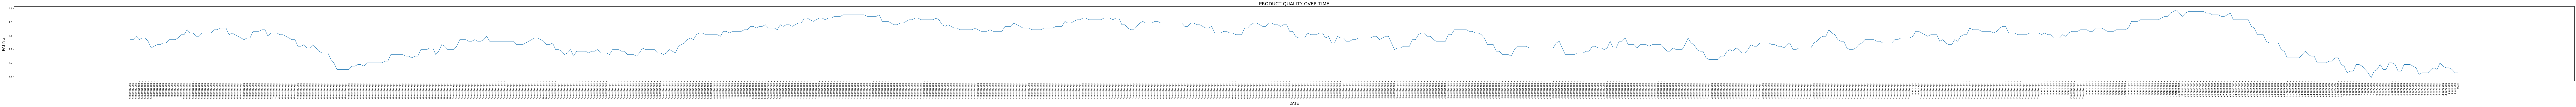

In [135]:
x = df1['id']
y = df1['temp']
  
plt.figure(figsize=(200, 6))
plt.plot(x, y)
plt.xticks(x, df1['DATE'], rotation=90)
plt.xlabel('DATE', labelpad=15, fontsize = 16)
plt.ylabel('RATING', labelpad=15, fontsize = 16)
plt.title("PRODUCT QUALITY OVER TIME", fontsize = 20)
plt.savefig('graph.png')
plt.savefig('graph_ok.png', bbox_inches='tight')
plt.show()